In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import pyodbc

In [10]:
df_csv = pd.read_csv(r"C:\Users\chands1\Downloads\full_data.csv")
print(df_csv.sum())

date            2019-12-312020-01-012020-01-022020-01-032020-0...
location        AfghanistanAfghanistanAfghanistanAfghanistanAf...
new_cases                                                 1314280
new_deaths                                                  60902
total_cases                                              16540873
total_deaths                                               641795
dtype: object


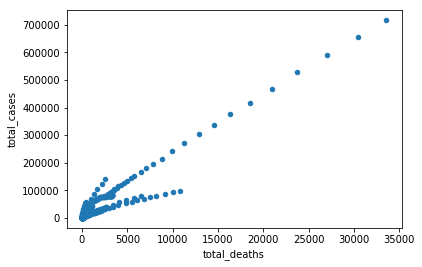

In [28]:
url='https://covid.ourworldindata.org/data/ecdc/full_data.csv'
df = pd.read_csv(url)
df.plot(kind='scatter',x='total_deaths',y='total_cases')
plt.show()

In [ ]:
#download  the csv file and replace the contents of the existing file with that of new file

In [12]:
url='https://covid.ourworldindata.org/data/ecdc/full_data.csv'
df = pd.read_csv(url)  
df.to_csv(r'Downloads\full_data.csv', index = False, header=True)

In [ ]:
#Truncate the existing table in the sql server

In [13]:
cnxn = pyodbc.connect('Driver={SQL Server};Server=KTCL-5CG9362KJQ\SQLEXPRESS;Database=GBSS;Trusted_Connection=yes;')
cursor = cnxn.cursor()
cursor.execute('''TRUNCATE TABLE [dbo].[full_data (2)]''')                
cnxn.commit()                

In [ ]:
#Insert the rows of the fresh file into table of the sqlserver

In [14]:
cnxn = pyodbc.connect('Driver={SQL Server};Server=KTCL-5CG9362KJQ\SQLEXPRESS;Database=GBSS;Trusted_Connection=yes;')
cursor = cnxn.cursor()
url='https://covid.ourworldindata.org/data/ecdc/full_data.csv'
df = pd.read_csv(url)
for rows in df.itertuples(index=False): # Iterate through csv
    cursor.execute("INSERT INTO [dbo].[full_data (2)](date,location,new_cases,new_deaths,total_cases,total_deaths) VALUES (?,?,?,?,?,?)",rows)
cnxn.commit()

In [ ]:
#to save the fresh csv file

In [15]:
url='https://covid.ourworldindata.org/data/ecdc/full_data.csv'
#to download the csv file from url and convert it to dataframe
df = pd.read_csv(url)
#to replace the contents of the file with fresh data 
df.to_csv('full_data.csv',index=False,header=True)

In [ ]:
#Function that downloads,replaces the file and database table with the fresh data

In [16]:
def insert_fresh_data():
    cnxn = pyodbc.connect('Driver={SQL Server};Server=KTCL-5CG9362KJQ\SQLEXPRESS;Database=GBSS;Trusted_Connection=yes;')
    cursor = cnxn.cursor()
    
    cursor.execute('''TRUNCATE TABLE [dbo].[full_data (2)]''') # removes the data of the table except column names               
    cnxn.commit()

    cursor=cnxn.cursor()
    url='https://covid.ourworldindata.org/data/ecdc/full_data.csv'
    df = pd.read_csv(url)
    df.to_csv('full_data.csv',index=False,header=True)  #replace the fresh data into file
    
    for rows in df.itertuples(index=False): # Iterate through each row elementof dataframe
        cursor.execute("INSERT INTO [dbo].[full_data (2)](date,location,new_cases,new_deaths,total_cases,total_deaths) VALUES (?,?,?,?,?,?)",rows)
    cnxn.commit()
insert_fresh_data()    